In [1]:
#Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import time
import chardet
import math
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 1) Análisis exploratorio de datos

In [3]:
#Importo dataset
ofertas = pd.read_csv("ofertas_relampago.csv")
ofertas.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


In [4]:
#Cantidad de filas y columnas
np.shape(ofertas)

(48746, 13)

In [5]:
#Variables disponibles
ofertas.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID'],
      dtype='object')

In [6]:
#Valores nulos
ofertas.isnull().sum()

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

In [7]:
#Recalculo la cantidad vendida
ofertas['SOLD_QUANTITY'] = ofertas['INVOLVED_STOCK'] - ofertas['REMAINING_STOCK_AFTER_END']

#Si la cantidad vendida es 0, el importe tambien es 0
ofertas.loc[ofertas['SOLD_QUANTITY'] == 0, 'SOLD_AMOUNT'] = 0

In [8]:
#Vuelvo a chequear nulos
ofertas.isnull().sum()

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                    588
SOLD_QUANTITY                    0
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

In [9]:
#Valores columna ORIGIN
ofertas["ORIGIN"].unique()

array(['A', nan], dtype=object)

In [10]:
#Elimino columna ORIGIN ya que no aporta ningún dato y contiene muchos nulos
ofertas.drop('ORIGIN', axis=1, inplace=True)

In [11]:
#Visualizo los nulos de SOLD_AMOUNT
filas_con_nulos = ofertas.isnull().any(axis=1)
df_nulos = ofertas[filas_con_nulos]
df_nulos.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,11,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
299,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:01+00:00,lightning_deal,15,7,NaN,8,free_shipping,ELECTRONICS,CE,MLM-FANS
522,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 21:00:00+00:00,lightning_deal,100,96,NaN,4,free_shipping,MOBILE,CE,MLM-TABLETS
623,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:04+00:00,lightning_deal,10,5,NaN,5,none,COMPUTERS,CE,MLM-MICROPHONES
641,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 21:22:13+00:00,lightning_deal,15,0,NaN,15,free_shipping,ELECTRONICS,CE,MLM-MEMORY_CARDS


In [12]:
#Elimino los nulos ya que no se pueden salvar y representas un % menor del dataset
ofertas = ofertas.dropna(axis = 0)

In [13]:
#Tipos de ofertas
ofertas["OFFER_TYPE"].unique()

array(['lightning_deal'], dtype=object)

In [14]:
#Top 10 cantidad de ofertas por rubro
ofertas['DOM_DOMAIN_AGG1'].value_counts().head(10)

DOM_DOMAIN_AGG1
HOME&DECOR            6727
APPAREL ACCESORIES    4387
APPAREL               3855
COMPUTERS             3571
SPORTS                3287
PHARMACEUTICS         3027
PERSONAL CARE         3011
ELECTRONICS           2859
MOBILE                1791
AUTOPARTS             1691
Name: count, dtype: int64

In [15]:
#Top 10 cantidad de ventas por rubro
ofertas.groupby('DOM_DOMAIN_AGG1')['SOLD_QUANTITY'].sum().sort_values(ascending=False).head(10)

DOM_DOMAIN_AGG1
PHARMACEUTICS         94967
BEAUTY EQUIPMENT      23324
HOME&DECOR            18132
COMPUTERS             11707
SPORTS                 7611
APPAREL                7222
APPAREL ACCESORIES     7169
MOBILE                 6183
PERSONAL CARE          6089
ELECTRONICS            5681
Name: SOLD_QUANTITY, dtype: int64

In [16]:
#Top 10 importe vendido por rubro
ofertas.groupby('DOM_DOMAIN_AGG1')['SOLD_AMOUNT'].sum().sort_values(ascending=False).head(10)

DOM_DOMAIN_AGG1
PHARMACEUTICS         440101.59
MOBILE                158128.15
ELECTRONICS           119713.58
BEAUTY EQUIPMENT       88788.62
HOME&DECOR             87491.89
COMPUTERS              83878.12
APPAREL                36473.78
APPAREL ACCESORIES     36417.29
SPORTS                 33051.03
INDUSTRY               25828.86
Name: SOLD_AMOUNT, dtype: float64

In [17]:
#Relación importe total sobre cantidad de ventas por rubro
ofertas_amount = ofertas.groupby('DOM_DOMAIN_AGG1')['SOLD_AMOUNT'].sum().reset_index()
ofertas_amount = ofertas_amount.sort_values(by='DOM_DOMAIN_AGG1', ascending=True)

ofertas_cantidad = ofertas['DOM_DOMAIN_AGG1'].value_counts().reset_index()
ofertas_cantidad = ofertas_cantidad.sort_values(by='DOM_DOMAIN_AGG1', ascending=True)

union = pd.merge(ofertas_amount, ofertas_cantidad, on='DOM_DOMAIN_AGG1', how='left')
union['relacion_amount_ofertas'] = union['SOLD_AMOUNT'] / union['count']

union.sort_values(by='relacion_amount_ofertas', ascending=False).head(10)

,DOM_DOMAIN_AGG1,SOLD_AMOUNT,count,relacion_amount_ofertas
27,PHARMACEUTICS,440101.59,3027,145.392002
18,MOBILE,158128.15,1791,88.290424
8,BEAUTY EQUIPMENT,88788.62,1096,81.011515
13,ELECTRONICS,119713.58,2859,41.872536
34,VEHICULAR MULTIMEDIA,4144.59,102,40.633235
28,SECURITY,10758.67,320,33.620844
35,WHEELS & TIRES,1007.59,35,28.788286
11,COMPUTERS,83878.12,3571,23.488692
2,ANTIQUES & HOBBIES,113.80,5,22.760000
17,INDUSTRY,25828.86,1168,22.113750


In [18]:
#Calculo duracion de las ofertas
ofertas['OFFER_START_DTTM'] = pd.to_datetime(ofertas['OFFER_START_DTTM'], format="%Y-%m-%d %H:%M:%S%z")
ofertas['OFFER_FINISH_DTTM'] = pd.to_datetime(ofertas['OFFER_FINISH_DTTM'], format="%Y-%m-%d %H:%M:%S%z")

ofertas['OFFER_DURATION_HS'] = (ofertas['OFFER_FINISH_DTTM'] - ofertas['OFFER_START_DTTM']).dt.total_seconds()/3600

ofertas['OFFER_DURATION_HS'] = np.round(ofertas['OFFER_DURATION_HS'], decimals=0)

In [19]:
#Top 10 duración de ofertas
ofertas['OFFER_DURATION_HS'].value_counts().head(10)

OFFER_DURATION_HS
6.0     30319
8.0      7481
0.0      3942
7.0      2352
5.0      1350
4.0       849
3.0       687
2.0       560
1.0       370
12.0      173
Name: count, dtype: int64

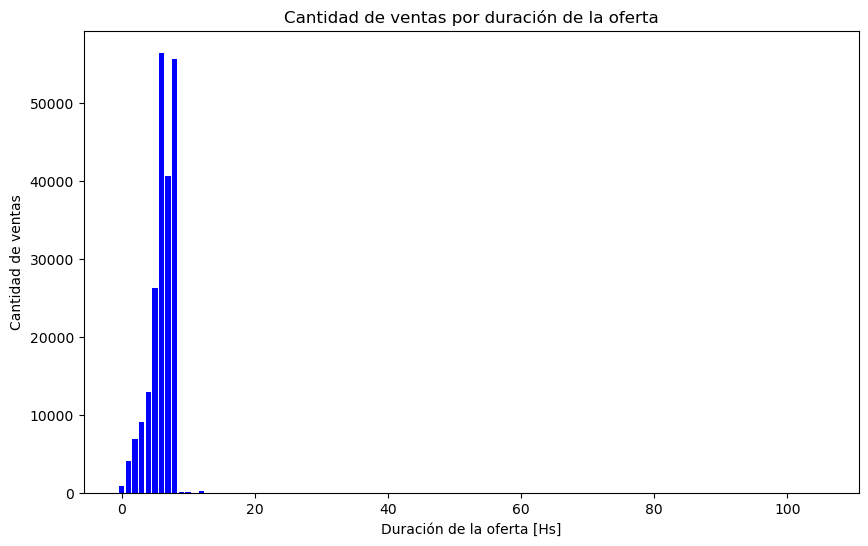

In [20]:
#Cantidad de ventas por duración de la oferta
ofertas_agg = ofertas.groupby('OFFER_DURATION_HS')['SOLD_QUANTITY'].sum()
duracion = ofertas_agg.index.to_numpy()
ventas_totales = ofertas_agg.to_numpy()

plt.figure(figsize=(10, 6))
plt.bar(duracion, ventas_totales, color='blue')
plt.title('Cantidad de ventas por duración de la oferta')
plt.xlabel('Duración de la oferta [Hs]')
plt.ylabel('Cantidad de ventas')
plt.show()

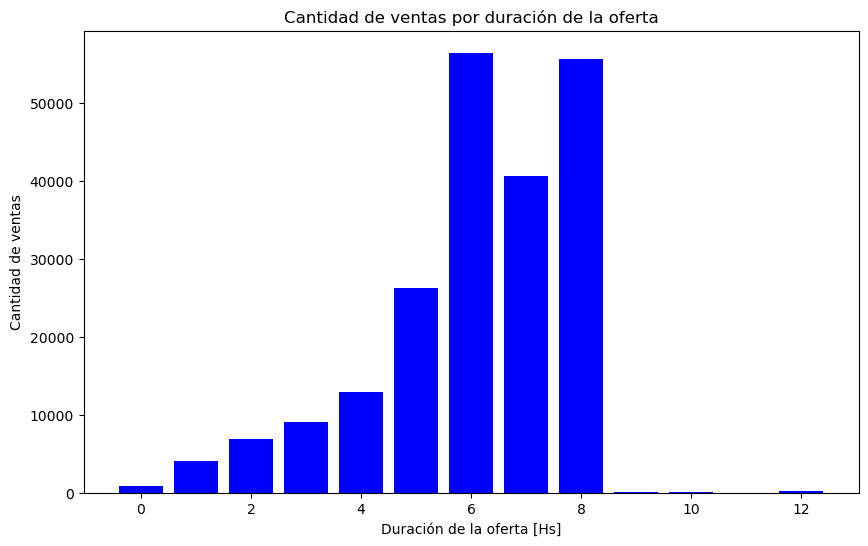

In [21]:
#Me quedo con las ofertas que duran menos de 15hs para visualizar mejor
indices_filtrados = np.where((ofertas['OFFER_DURATION_HS'] < 15))

ofertas_agg = ofertas.iloc[indices_filtrados].groupby('OFFER_DURATION_HS')['SOLD_QUANTITY'].sum()
duracion = ofertas_agg.index.to_numpy()
ventas_totales = ofertas_agg.to_numpy()

plt.figure(figsize=(10, 6))
plt.bar(duracion, ventas_totales, color='blue')
plt.title('Cantidad de ventas por duración de la oferta')
plt.xlabel('Duración de la oferta [Hs]')
plt.ylabel('Cantidad de ventas')
plt.show()

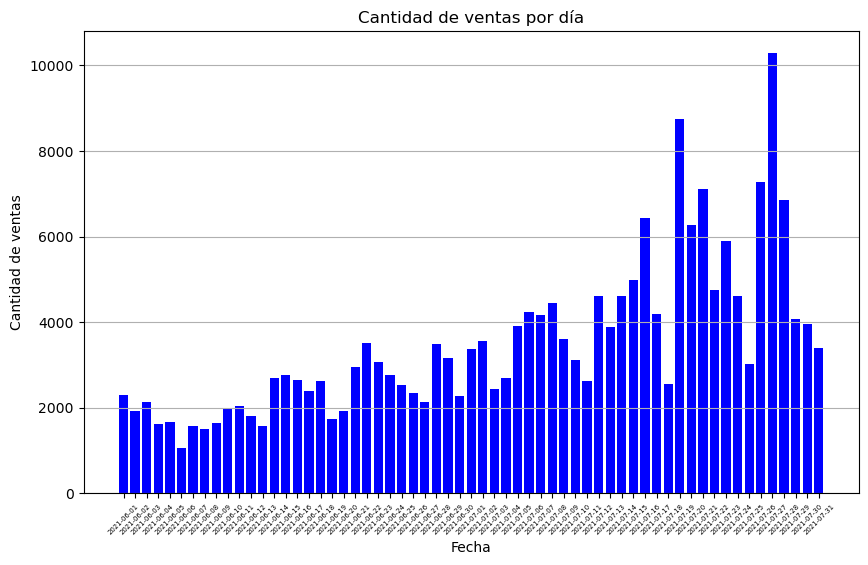

In [22]:
#Cantidad de ventas por dia
ofertas_agg = ofertas.groupby('OFFER_START_DATE')['SOLD_QUANTITY'].sum()
fechas = ofertas_agg.index.to_numpy()
ventas_totales = ofertas_agg.to_numpy()

plt.figure(figsize=(10, 6))
plt.bar(fechas, ventas_totales, color='blue') 
plt.title('Cantidad de ventas por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=45)
plt.xticks(fontsize=5)
plt.grid(axis='y')
plt.show()

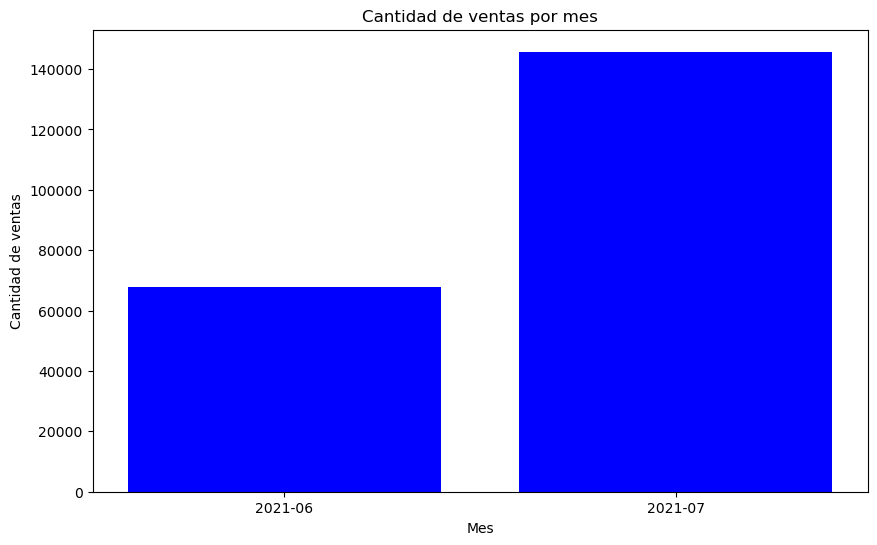

In [23]:
#Cantidad de ventas por mes
ofertas['ARCHIVE'] = ofertas['OFFER_START_DATE'].str.slice(0, 7)

ofertas_agg = ofertas.groupby('ARCHIVE')['SOLD_QUANTITY'].sum()
fechas = ofertas_agg.index.to_numpy()
ventas_totales = ofertas_agg.to_numpy()

plt.figure(figsize=(10, 6))
plt.bar(fechas, ventas_totales, color='blue') 
plt.title('Cantidad de ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de ventas')
plt.show()

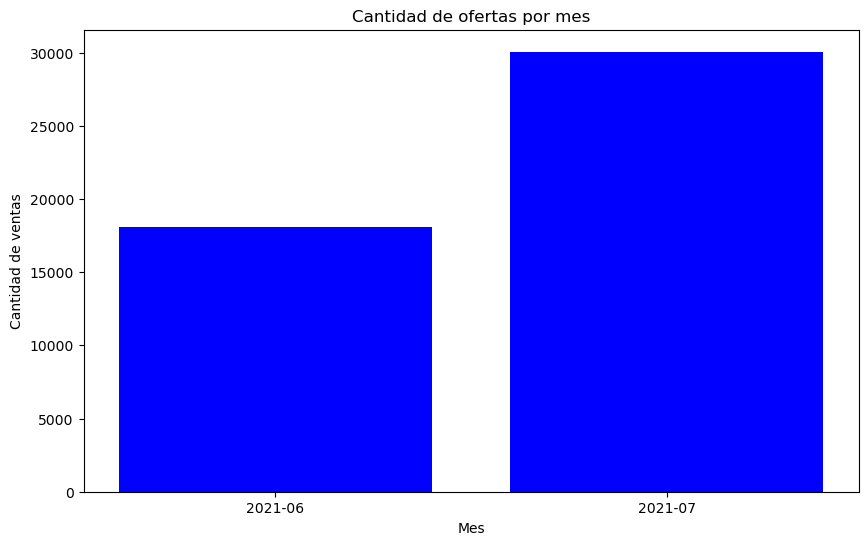

In [24]:
#Cantidad de ofertas por mes
ofertas_agg = ofertas.groupby('ARCHIVE')['ARCHIVE'].count()
fechas = ofertas_agg.index.to_numpy()
ventas_totales = ofertas_agg.to_numpy()

plt.figure(figsize=(10, 6))
plt.bar(fechas, ventas_totales, color='blue') 
plt.title('Cantidad de ofertas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de ventas')
plt.show()

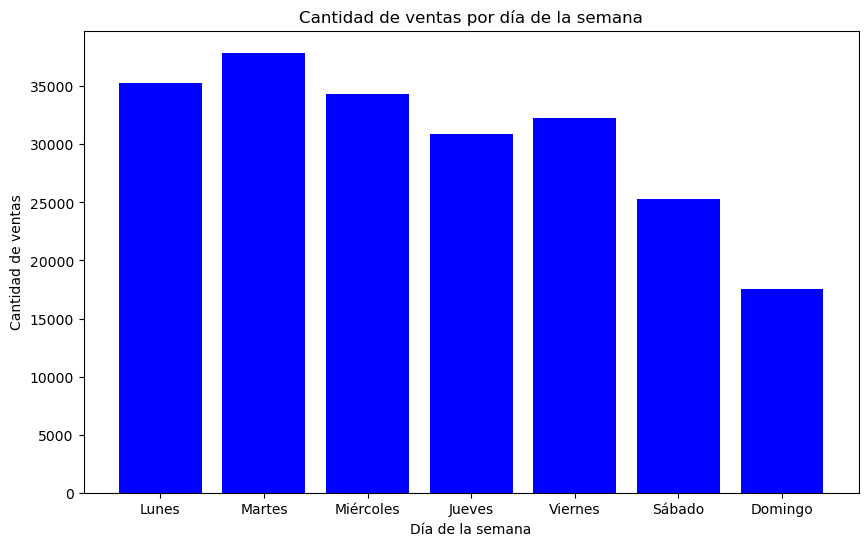

In [25]:
#Cantidad de ventas por día de la semana
ofertas['OFFER_START_DATE'] = pd.to_datetime(ofertas['OFFER_START_DTTM'], format="%Y-%m-%d %H:%M:%S%z")
ofertas['WEEKDAY'] = ofertas['OFFER_START_DATE'].dt.dayofweek

ofertas_agg = ofertas.groupby('WEEKDAY')['SOLD_QUANTITY'].sum()
fechas = ofertas_agg.index.to_numpy()
ventas_totales = ofertas_agg.to_numpy()

custom_labels = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

plt.figure(figsize=(10, 6))
plt.bar(fechas, ventas_totales, color='blue') 
plt.title('Cantidad de ventas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de ventas')
plt.xticks(fechas, custom_labels)
plt.show()

# 2) Similitud entre productos

In [27]:
#Importo dataset
titulos = pd.read_csv("items_titles.csv")
titulos.head()

,ITE_ITEM_TITLE
0,Tênis Ascension Posh Masculino - Preto E Verme...
1,Tenis Para Caminhada Super Levinho Spider Corr...
2,Tênis Feminino Le Parc Hocks Black/ice Origina...
3,Tênis Olympikus Esportivo Academia Nova Tendên...
4,Inteligente Led Bicicleta Tauda Luz Usb Bicicl...


In [28]:
#Función para obtener los 10 más similares de dataset
def similitud(titulo_input):
    titulos['ITE_ITEM_TITLE_INPUT'] = titulo_input
    score_list = []
    
    for i in range(len(titulos['ITE_ITEM_TITLE'])):
        
        titulo = titulos['ITE_ITEM_TITLE'][i].strip()
        titulo_input = titulo_input.strip()
        titulo_list = titulo.split()
        titulo_input_list = titulo_input.split()
        
        if(titulo_input == titulo):
            score_list.append(1)
        else:
            score = 0
            for j in range(len(titulo_input_list)):
                if(titulo_input_list[j] in titulo_list):
                    score = score + 1/len(titulo_input_list)
            score_list.append(score)
            
    titulos['SCORE'] = score_list
    titulos_similares = titulos.sort_values(by='SCORE', ascending=False).head(10).reset_index(drop=True)

    return titulos_similares

In [29]:
#Título que queremos determinar la similitud
titulo_input = 'Tênis Ascension Posh Masculino - Preto E Vermelho '

#Llamo a la función
similitud(titulo_input)

,ITE_ITEM_TITLE,ITE_ITEM_TITLE_INPUT,SCORE
0,Tênis Ascension Posh Masculino - Preto E Verme...,Tênis Ascension Posh Masculino - Preto E Verme...,1.00
1,Tênis New Try Running Masculino - Vermelho E P...,Tênis Ascension Posh Masculino - Preto E Verme...,0.75
2,Tênis Asics Gel Quantum 180 5 Masculino - Pret...,Tênis Ascension Posh Masculino - Preto E Verme...,0.75
3,Tênis Masculino Ascension Bx1949 - Preto E Mar...,Tênis Ascension Posh Masculino - Preto E Verme...,0.75
4,Tênis Asics Gel Pacemaker 2 Masculino - Preto ...,Tênis Ascension Posh Masculino - Preto E Verme...,0.75
5,Tênis Olympikus Fluido Masculino - Preto E Ver...,Tênis Ascension Posh Masculino - Preto E Verme...,0.75
6,Tênis Ascension Voltage Masculino - Preto E Ve...,Tênis Ascension Posh Masculino - Preto E Verme...,0.75
7,Dois Pares Tênis Kappa Impact Masculino - Pret...,Tênis Ascension Posh Masculino - Preto E Verme...,0.75
8,Tênis Mizuno Hawk 3 - Masculino - Preto E Verm...,Tênis Ascension Posh Masculino - Preto E Verme...,0.75
9,Tênis adidas Duramo Sl Preto E Vermelho - Masc...,Tênis Ascension Posh Masculino - Preto E Verme...,0.75


In [30]:
#Para obtener el tiempo de ejecución de la función
start_time = time.time()

similitud(titulo_input)

end_time = time.time()
total_time = end_time - start_time

print(f'Tiempo de ejecución {total_time} segundos')

Tiempo de ejecución 0.3885650634765625 segundos


In [31]:
#Concateno el dataset para obtener otro con el doble de registros
titulos = pd.concat([titulos] * 10, ignore_index=True)

print(f'Cantidad de registros {np.shape(titulos)[0]}')

start_time = time.time()

similitud(titulo_input)

end_time = time.time()
total_time = end_time - start_time

print(f'Tiempo de ejecución {total_time} segundos')

Cantidad de registros 300000
Tiempo de ejecución 4.953450679779053 segundos


Dado que la función "similitud" recorre todo el dataset y va comparando el valor input con cada título, no es una solución escalable debido a que el aumento de registros del dataset provocará un aumento en el tiempo de ejecución de la función.

# 3) Previsión de falla

In [34]:
#Importo dataset
full = pd.read_csv("full_devices.csv", encoding="ISO-8859-1")
full.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [35]:
np.shape(full)

(124494, 12)

In [36]:
#Dispositivos únicos
len(full['device'].unique())

1169

In [37]:
full["failure"].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

In [38]:
#Me quedo con los registros donde hay falla
failure_data = full[full['failure'] == 1]
failure_data.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
4885,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
6879,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
8823,2015-01-09,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,8,0
11957,2015-01-13,W1F13SRV,1,188251248,2040,0,0,6,39345,32,32,1
12668,2015-01-14,W1F1230J,1,220461296,0,0,0,14,325125,0,0,0


In [39]:
np.shape(failure_data)

(106, 12)

In [40]:
#Me quedo con los ids de los dispositivos que fallaron en algun momento
devices = failure_data[['date', 'device']]
devices

,date,device
4885,2015-01-05,S1F0RRB1
6879,2015-01-07,S1F0CTDN
8823,2015-01-09,W1F0PNA5
11957,2015-01-13,W1F13SRV
12668,2015-01-14,W1F1230J
...,...,...
109927,2015-08-04,W1F1CB5E
114251,2015-08-18,Z1F0MRPJ
122118,2015-10-05,S1F0JGJV
122808,2015-10-09,Z1F14BGY


In [41]:
#Filtro la data con los ids que fallaron en algún momento, es decir saco los ids que nunca fallaron
df_filtrado = full[full['device'].isin(devices['device'])]
df_filtrado

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
7,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
23,2015-01-01,S1F03YZM,0,55587136,0,0,0,7,199132,0,0,0
44,2015-01-01,S1F09DZQ,0,12568128,136,0,2,6,380112,0,0,2
63,2015-01-01,S1F0CTDN,0,50147888,528,0,4,9,381198,32,32,3
74,2015-01-01,S1F0DSTY,0,8471680,0,0,0,11,436682,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
124178,2015-10-22,W1F0T0B1,0,112824920,0,0,0,9,352949,16,16,0
124233,2015-10-23,W1F0T0B1,0,52620456,0,0,0,9,352949,16,16,0
124265,2015-10-24,W1F0T0B1,0,154144032,0,0,0,9,352949,16,16,0
124297,2015-10-25,W1F0T0B1,0,86280056,0,0,7,9,354072,22,22,0


In [42]:
#Hago merge para sumarle la fecha que falló cada dispositivo
df = pd.merge(df_filtrado, devices, on='device', how='left')
df

,date_x,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,date_y
0,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3,2015-01-19
1,2015-01-01,S1F03YZM,0,55587136,0,0,0,7,199132,0,0,0,2015-08-03
2,2015-01-01,S1F09DZQ,0,12568128,136,0,2,6,380112,0,0,2,2015-07-18
3,2015-01-01,S1F0CTDN,0,50147888,528,0,4,9,381198,32,32,3,2015-01-07
4,2015-01-01,S1F0DSTY,0,8471680,0,0,0,11,436682,0,0,0,2015-02-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,2015-10-22,W1F0T0B1,0,112824920,0,0,0,9,352949,16,16,0,2015-10-26
10709,2015-10-23,W1F0T0B1,0,52620456,0,0,0,9,352949,16,16,0,2015-10-26
10710,2015-10-24,W1F0T0B1,0,154144032,0,0,0,9,352949,16,16,0,2015-10-26
10711,2015-10-25,W1F0T0B1,0,86280056,0,0,7,9,354072,22,22,0,2015-10-26


In [43]:
#Renombro las columnas
df.rename(columns={'date_x': 'date'}, inplace=True)
df.rename(columns={'date_y': 'date_failure'}, inplace=True)
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,date_failure
0,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3,2015-01-19
1,2015-01-01,S1F03YZM,0,55587136,0,0,0,7,199132,0,0,0,2015-08-03
2,2015-01-01,S1F09DZQ,0,12568128,136,0,2,6,380112,0,0,2,2015-07-18
3,2015-01-01,S1F0CTDN,0,50147888,528,0,4,9,381198,32,32,3,2015-01-07
4,2015-01-01,S1F0DSTY,0,8471680,0,0,0,11,436682,0,0,0,2015-02-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,2015-10-22,W1F0T0B1,0,112824920,0,0,0,9,352949,16,16,0,2015-10-26
10709,2015-10-23,W1F0T0B1,0,52620456,0,0,0,9,352949,16,16,0,2015-10-26
10710,2015-10-24,W1F0T0B1,0,154144032,0,0,0,9,352949,16,16,0,2015-10-26
10711,2015-10-25,W1F0T0B1,0,86280056,0,0,7,9,354072,22,22,0,2015-10-26


In [44]:
#Calculo los días que faltan para la falla
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df['date_failure'] = pd.to_datetime(df['date_failure'], format="%Y-%m-%d")

df['days_to_failure'] = (df['date_failure'] - df['date']).dt.days
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,date_failure,days_to_failure
0,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3,2015-01-19,18
1,2015-01-01,S1F03YZM,0,55587136,0,0,0,7,199132,0,0,0,2015-08-03,214
2,2015-01-01,S1F09DZQ,0,12568128,136,0,2,6,380112,0,0,2,2015-07-18,198
3,2015-01-01,S1F0CTDN,0,50147888,528,0,4,9,381198,32,32,3,2015-01-07,6
4,2015-01-01,S1F0DSTY,0,8471680,0,0,0,11,436682,0,0,0,2015-02-14,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,2015-10-22,W1F0T0B1,0,112824920,0,0,0,9,352949,16,16,0,2015-10-26,4
10709,2015-10-23,W1F0T0B1,0,52620456,0,0,0,9,352949,16,16,0,2015-10-26,3
10710,2015-10-24,W1F0T0B1,0,154144032,0,0,0,9,352949,16,16,0,2015-10-26,2
10711,2015-10-25,W1F0T0B1,0,86280056,0,0,7,9,354072,22,22,0,2015-10-26,1


In [45]:
#Separo X e y:
#X = attributos 1 al 9
#y = dias para la proxima falla
y = df["days_to_failure"]

X = df.drop(['date', 'device', 'failure', 'date_failure', 'days_to_failure'], axis=1)

#Divido la data en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
#Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 462.8875205267797
R² Score: 0.8727145825772031


In [47]:
#Ejemplo para predecir el día de falla
column_names = ['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8', 'attribute9']
attributes = [215630672,56,0,52,6,407438,0,0,7]

values = pd.DataFrame([attributes], columns=column_names)

predict = math.floor(model.predict(values)[0])

fecha_falla = pd.to_datetime(full['date'].min()) + timedelta(days=predict)
fecha_mantenimiento = pd.to_datetime(full['date'].min()) + timedelta(days=predict-1)

print(f'El modelo predice que la falla ocurrirá en {predict} días desde la fecha de inicio (2015-01-01)')
print(f'La falla será el día {fecha_falla}')
print(f'Se debe hacer mantenimiento el día {fecha_mantenimiento}')

El modelo predice que la falla ocurrirá en 134 días desde la fecha de inicio (2015-01-01)
La falla será el día 2015-05-15 00:00:00
Se debe hacer mantenimiento el día 2015-05-14 00:00:00
